In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

This notebook extract task complexity per minute and task complexity per date.

In [3]:
DATA_DIR = "./mit_data"

dcgm_df = pd.read_csv(f'{DATA_DIR}/dcgm.csv')
user_df = pd.read_csv(f'{DATA_DIR}/scheduler_data.csv')

In [4]:
user_df = user_df[(user_df['time_start'] != -1) 
                           & (user_df['time_eligible'] != -1)
                           & (user_df['time_start'] != -1) 
                           & (user_df['time_end'] != -1)]

user_df['time_execute'] = user_df['time_end'] - user_df['time_start']
user_df['task_complexity'] = user_df['nodes_alloc'] * user_df['time_execute']

train_df = user_df[['id_user', 'time_submit', 'time_execute', 'nodes_alloc', 'task_complexity']]

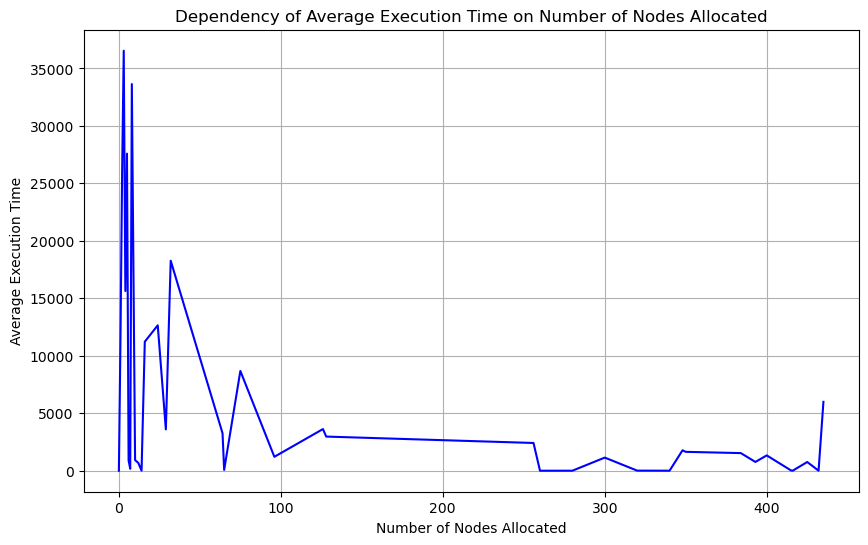

In [5]:
avg_execution_time = train_df.groupby('nodes_alloc')['time_execute'].mean().reset_index()

# Plot the dependency
plt.figure(figsize=(10, 6))
plt.plot(avg_execution_time['nodes_alloc'], avg_execution_time['time_execute'], linestyle='-', color='b')
plt.title('Dependency of Average Execution Time on Number of Nodes Allocated')
plt.xlabel('Number of Nodes Allocated')
plt.ylabel('Average Execution Time')
plt.grid(True)
plt.show()

In [6]:
train_df_aggregated = train_df.groupby('time_submit', as_index=False)['task_complexity'].sum()
train_df_aggregated['time_submit'] = pd.to_datetime(train_df_aggregated['time_submit'], unit='s')
train_df_aggregated['hour'] = train_df_aggregated['time_submit'].dt.hour
train_df_aggregated['minute'] = train_df_aggregated['time_submit'].dt.minute
train_df_aggregated['dayofweek'] = train_df_aggregated['time_submit'].dt.dayofweek
train_df_aggregated['date'] = train_df_aggregated['time_submit'].dt.date

In [11]:
def plot_complexity_over_time(time, complexity):
  plt.figure(figsize=(20, 6))
  plt.plot(time, complexity, color='blue', alpha=0.8)
  plt.xlabel('Time', fontsize=14)
  plt.ylabel('Complexity', fontsize=14)
  plt.grid(axis='both', linestyle='--', alpha=0.7)
  plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability
  plt.show()

In [7]:
sorted_complexity = sorted(train_df_aggregated['task_complexity'], reverse=True)

In [8]:
len(sorted_complexity)

68596

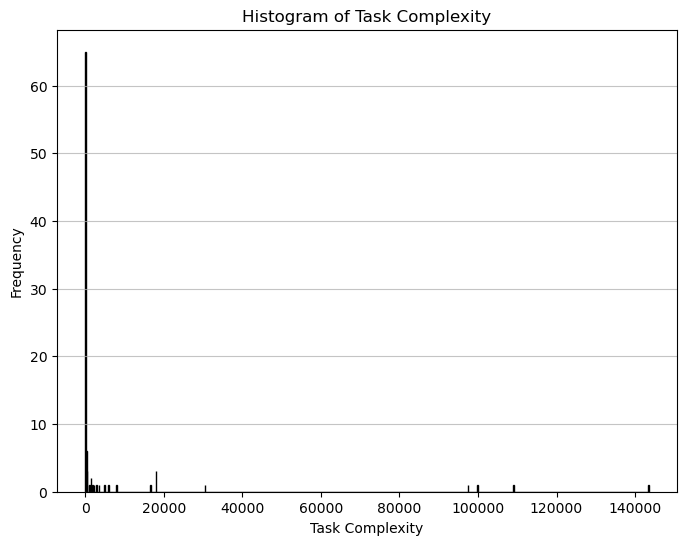

In [32]:
plt.figure(figsize=(8, 6))
plt.hist(train_df_aggregated['task_complexity'][68500:], bins=1000, color='skyblue', edgecolor='black')
plt.title("Histogram of Task Complexity")
plt.xlabel("Task Complexity")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

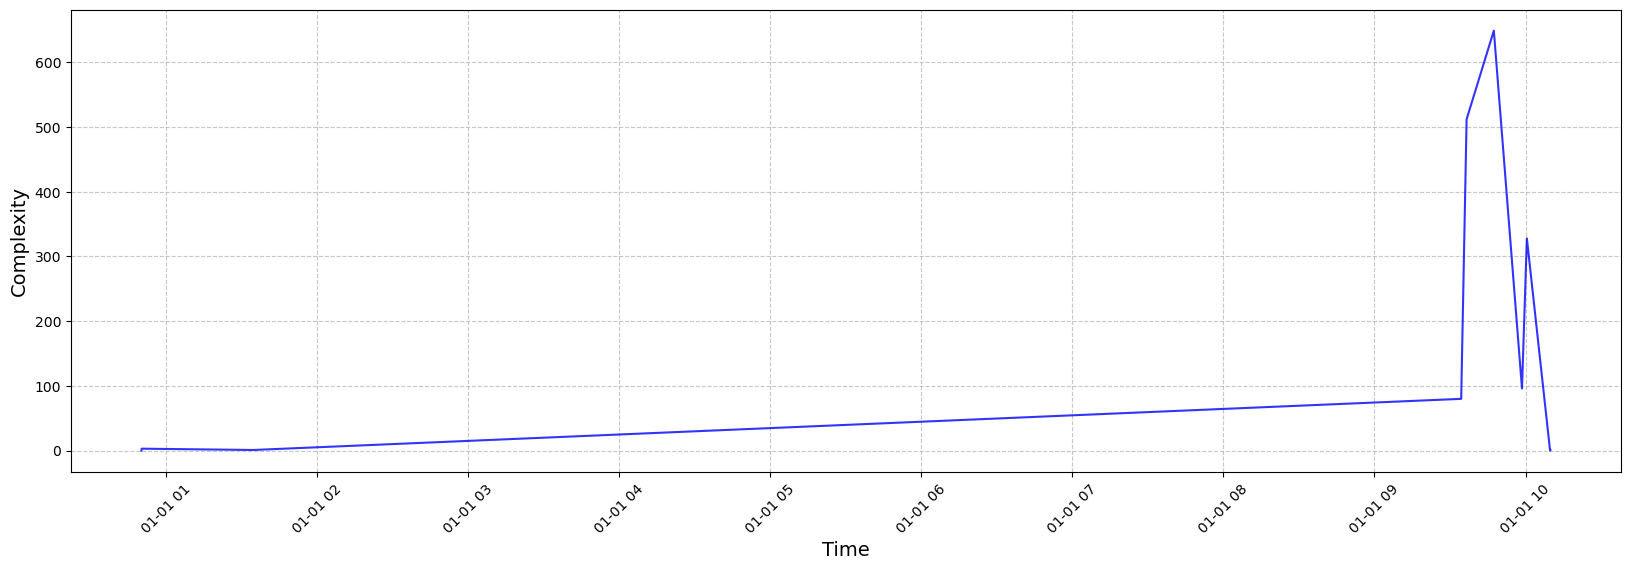

In [15]:
plot_complexity_over_time(train_df_aggregated['time_submit'][:10], train_df_aggregated['task_complexity'][:10])


In [9]:
# Round down time_submit to the nearest hour
train_df_aggregated['hourly_time'] = train_df_aggregated['time_submit'].dt.floor('h')

# Group by the hourly time step and sum task_complexity
hourly_complexity = train_df_aggregated.groupby('hourly_time', as_index=False)['task_complexity'].sum()

In [ ]:
# Round down time_submit to the nearest hour
train_df_aggregated['hourly_time'] = train_df_aggregated['time_submit'].dt.floor('h')

# Group by the hourly time step and sum task_complexity
hourly_complexity = train_df_aggregated.groupby('hourly_time', as_index=False)['task_complexity'].sum()

# Create a complete range of hourly timestamps
start_time = hourly_complexity['hourly_time'].min()
end_time = hourly_complexity['hourly_time'].max()
all_hours = pd.date_range(start=start_time, end=end_time, freq='h')

# Reindex to include all hours and fill missing values with 0
hourly_complexity = hourly_complexity.set_index('hourly_time').reindex(all_hours, fill_value=0).reset_index()
hourly_complexity.columns = ['hourly_time', 'task_complexity']

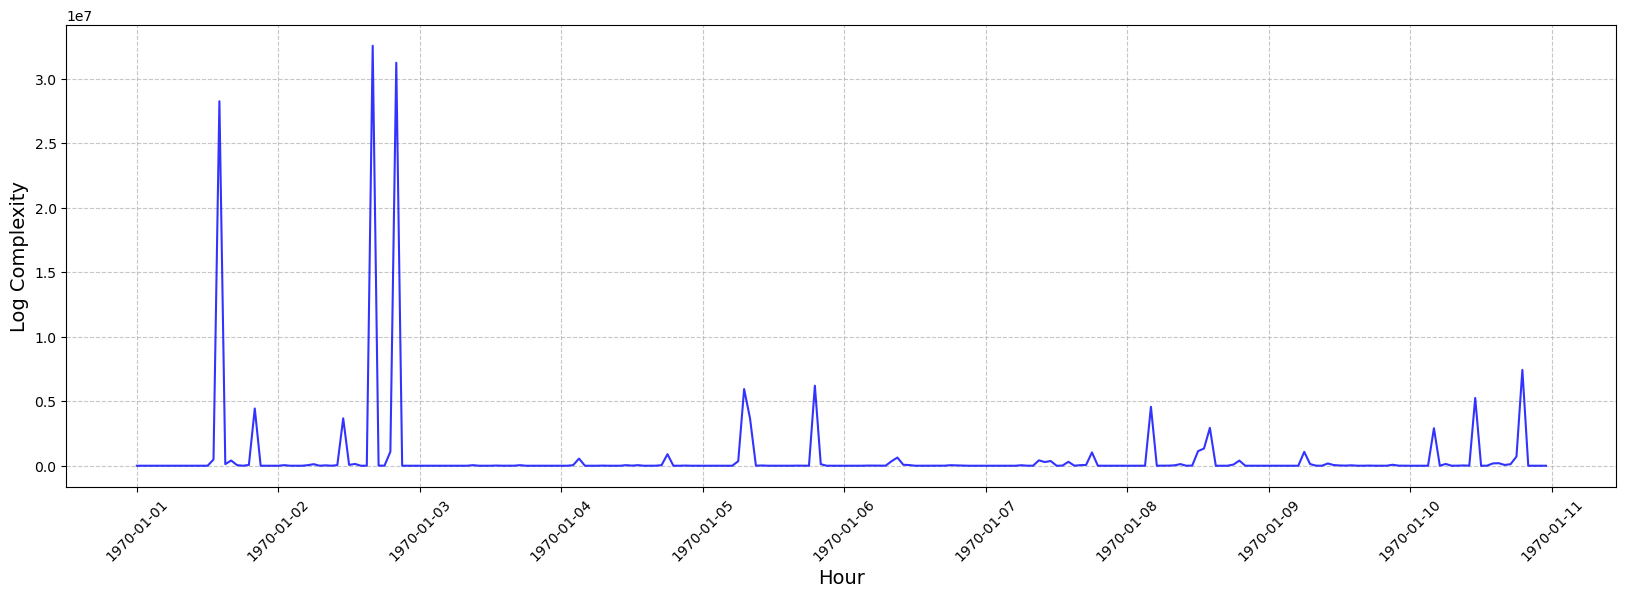

In [67]:
# Plot the results
plt.figure(figsize=(20, 6))
plt.plot(hourly_complexity['hourly_time'][:240], hourly_complexity['task_complexity'][:240], color='blue', alpha=0.8)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Complexity', fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability
plt.show()